# COVID-19 Analisys - The Italian Case (Danilo Giovannico)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates

%matplotlib inline

## Dataset Analysis

### Load Dataset

In [2]:
dataframe = pd.read_csv("../data/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv") 
dataframe.drop(['casi_testati', 'note_it','note_en'], axis=1, inplace=True)
dataframe = dataframe[:-1]
dataframe.describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01
mean,16788.734940,2046.024096,18834.771084,45811.807229,64646.566265,842.963855,2707.855422,36204.614458,14980.144578,115831.325301,9.808662e+05
std,9738.164337,1293.271640,10954.250392,31897.057579,40073.092884,2140.100200,1756.541177,37743.090304,11727.783608,82489.025386,9.244767e+05
min,101.000000,26.000000,127.000000,94.000000,221.000000,-6939.000000,78.000000,1.000000,7.000000,229.000000,4.324000e+03
25%,10031.500000,975.500000,11255.000000,9732.500000,21838.000000,-305.500000,1152.000000,2542.000000,1983.500000,26363.500000,1.314305e+05
50%,17569.000000,1956.000000,19147.000000,58320.000000,80572.000000,620.000000,2646.000000,21815.000000,15887.000000,128948.000000,6.914610e+05
75%,25907.500000,3232.000000,29179.500000,74561.000000,100486.500000,2294.000000,4051.500000,64024.000000,26514.000000,196513.000000,1.732701e+06
max,29010.000000,4068.000000,33004.000000,83652.000000,108257.000000,4821.000000,6557.000000,122810.000000,31763.000000,224760.000000,2.944859e+06


### Print Correlation Table

In [3]:
dataframe.corr()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
ricoverati_con_sintomi,1.000000,0.932646,0.999092,0.700712,0.830857,0.249638,0.711077,0.190425,0.497752,0.561526,0.252167
terapia_intensiva,0.932646,1.000000,0.947168,0.401507,0.578503,0.536263,0.874710,-0.126540,0.172541,0.247669,-0.070814
totale_ospedalizzati,0.999092,0.947168,1.000000,0.670324,0.806916,0.285236,0.735405,0.154345,0.462863,0.528427,0.215811
isolamento_domiciliare,0.700712,0.401507,0.670324,1.000000,0.979210,-0.427156,0.097101,0.770576,0.948230,0.963092,0.816113
totale_positivi,0.830857,0.578503,0.806916,0.979210,1.000000,-0.262033,0.278318,0.655548,0.881292,0.911044,0.708597
variazione_totale_positivi,0.249638,0.536263,0.285236,-0.427156,-0.262033,1.000000,0.755403,-0.745623,-0.612847,-0.555588,-0.723616
nuovi_positivi,0.711077,0.874710,0.735405,0.097101,0.278318,0.755403,1.000000,-0.325701,-0.106445,-0.028952,-0.284617
dimessi_guariti,0.190425,-0.126540,0.154345,0.770576,0.655548,-0.745623,-0.325701,1.000000,0.932055,0.908532,0.997001
deceduti,0.497752,0.172541,0.462863,0.948230,0.881292,-0.612847,-0.106445,0.932055,1.000000,0.996769,0.955968
totale_casi,0.561526,0.247669,0.528427,0.963092,0.911044,-0.555588,-0.028952,0.908532,0.996769,1.000000,0.936330


### Plot correlation map with seaborn

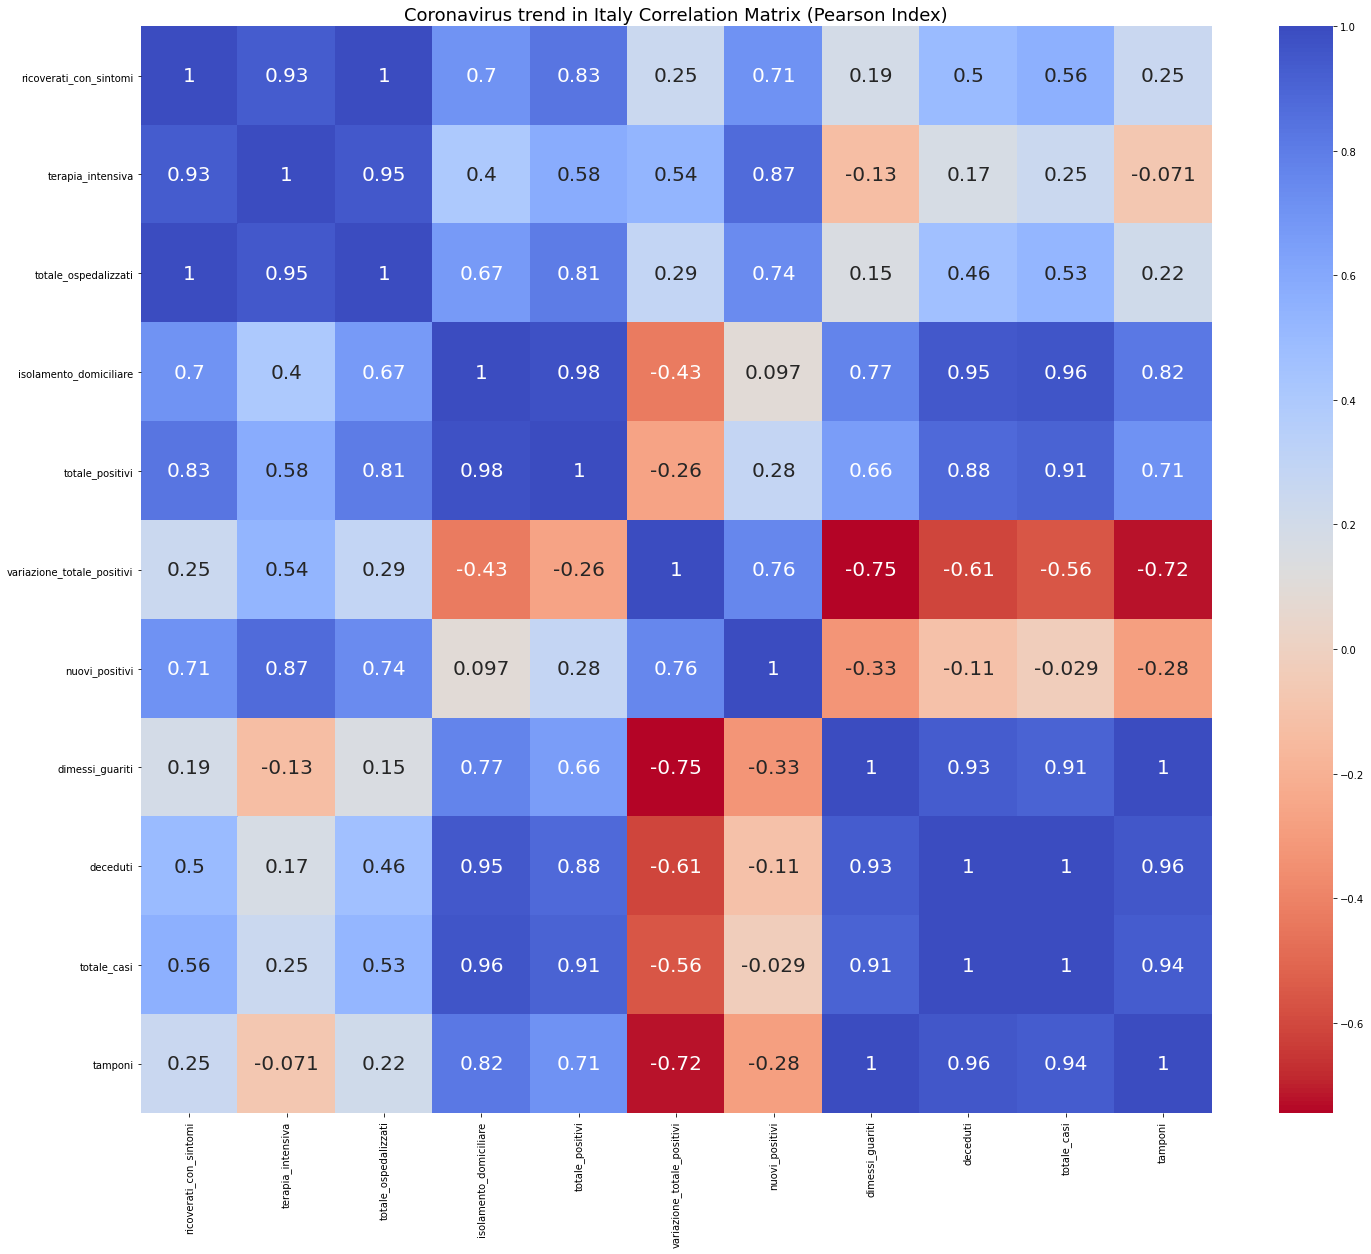

In [4]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = dataframe.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Coronavirus trend in Italy Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

Plot pairwise relationships in a dataset.

In [ ]:
sns.pairplot(dataframe)

## Trendlines Analysis for the virus
Eseguo un analisi dei trend di andamento sul virus.

In [ ]:
print()
dataframe['data_nuova'] = dataframe.apply(lambda row: datetime.strptime(row.data.split('T')[0], '%Y-%m-%d'), axis=1)

### Trend: Total cases, Total Active positives, Hospitalized, Intensive Care

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='totale_casi', data=dataframe, label='Total cases', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='totale_positivi', data=dataframe, label='Total Active positives', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='totale_ospedalizzati', data=dataframe, label='Hospitalized', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='terapia_intensiva', data=dataframe, label='Intensive Care', ax=ax, lw=2)
plt.ylabel('Units', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 trendlines in Italy from 24/02/2020', fontsize=16)

### Trend: Recovered, Dead

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='ricoverati_con_sintomi', data=dataframe, label='Positive Hospitalized', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='deceduti', data=dataframe, label='Dead', ax=ax, lw=2)
plt.ylabel('Units', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 trendlines in Italy from 24/02/2020', fontsize=16)

## Ratio Trendlines for the virus
Eseguo un'analisi dei rapporti sull'andamento del virus.

#### Observation
Rapporti non veritieri poichè dovrei considerate anche i positivi asintomatici.

### Ratio of Itensive care over total cases and Ratio Dead People Over Total Cases

In [ ]:
# Ratio of Itensive care over total cases
dataframe['IC_TP_R'] = dataframe['terapia_intensiva']/dataframe['totale_positivi']
# Ratio of dead people over total cases
dataframe['D_TP_R'] = dataframe['deceduti']/dataframe['totale_positivi']

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='IC_TP_R', data=dataframe, label='Ratio of Itensive care over total cases', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='D_TP_R', data=dataframe, label='Ratio Dead People Over Total Cases', ax=ax, lw=2)
plt.ylabel('Fraction', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 Dead and Intensive Care Ratios in Italy from 24/02/2020', fontsize=16)

## Total Tampons Performed

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='tamponi', data=dataframe, label='Total Tampons', ax=ax, lw=2)
plt.ylabel('Fraction', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 Total Tampons in Italy from 24/02/2020', fontsize=16)

### Ratio of Daily Positive over Daily and Total Tampons

In [ ]:
# Ratio of new cases over (daily/total) tampons
dataframe['NP_DT_R'] = dataframe['nuovi_positivi']/dataframe['tamponi'].diff().fillna(dataframe['tamponi'])
dataframe['NP_T_R'] = dataframe['nuovi_positivi']/dataframe['tamponi']

fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='NP_DT_R', data=dataframe, label='Daily Positive / Daily Tampons', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='NP_T_R', data=dataframe, label='Daily Positive / Total Tampons', ax=ax, lw=2)
plt.ylabel('Fraction', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 Ratio of Daily Positive over (Daily/Total) Tampons in Italy from 24/02/2020', fontsize=16)

### Ratio Ratio of New Positive over Total Positive and own AVG to remove peak

In [ ]:
# Ratio of new positives over total positives
dataframe['NP_TP_R'] = dataframe['nuovi_positivi']/dataframe['totale_positivi']
# To remove peak apply mean with windows (size=5)
dataframe['AVG_NP_TP_R'] = dataframe['NP_TP_R'].rolling(window=5).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='NP_TP_R', data=dataframe, label='New Positive / Total Positives', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='AVG_NP_TP_R', data=dataframe, label='AVG(New Positive / Total Positives)', ax=ax, lw=2)
plt.ylabel('Fraction', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 Ratio of New Positive over Total Positive in Italy from 24/02/2020', fontsize=16)

### Ratio of Hospitalized over Total Positive and Dead over Hospitalized

In [ ]:
# Ratio of hospitalized over total cases
dataframe['H_TP_R'] = dataframe['totale_ospedalizzati']/dataframe['totale_positivi']
# Ratio of hospitalized over dead
dataframe['H_D_R'] = dataframe['deceduti']/dataframe['totale_ospedalizzati']

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.lineplot(x='data_nuova',y='H_TP_R', data=dataframe, label='Hospitalized / Total Positives', ax=ax, lw=2)
sns.lineplot(x='data_nuova',y='H_D_R', data=dataframe, label='Dead / Hospitalized', ax=ax, lw=2)
plt.ylabel('%(x100)', fontsize=14)
plt.xlabel('Date', fontsize=14)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Covid-19 Ratio of Hospitalized over Total Positive and Dead over Hospitalized in Italy from 24/02/2020', fontsize=16)

## Preprocessing for training models

In [ ]:
pred_label = 'dimessi_guariti' #totale_casi #isolamento_domiciliare #totale_ospedalizzati #dimessi_guariti #totale_positivi #deceduti
start_date = "2020-01-01T18:00:00"

cleared_dataframe = dataframe.loc[:,['data',pred_label,'totale_positivi']]
FMT = '%Y-%m-%dT%H:%M:%S'
date = cleared_dataframe['data']
cleared_dataframe['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime(start_date, FMT)).days)
print(cleared_dataframe.head())

#### Remark
To solve the problem of data overestimation on the exponential model and given the lack of values ​​prior to February 22, I decided to introduce zero values ​​from the starting point to the first one detected.

In [ ]:
hidden_data = list()
if cleared_dataframe['data'][0] > 0:
    for i in range(0,cleared_dataframe['data'][0]):
        hidden_data.append([i,0,0])

hidden_df = pd.DataFrame(hidden_data, columns = ['data',pred_label,'totale_positivi'])

fulldataframe = hidden_df.append(cleared_dataframe, ignore_index=True)

In [ ]:
print(fulldataframe.head())

## Training and Plot Model

## The logistic model
Il modello logistico è stato ampiamente utilizzato per descrivere la crescita di una popolazione. Un'infezione può essere descritta come la crescita della popolazione di un agente patogeno, quindi un modello logistico sembra adatto.

In [ ]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [ ]:
X = list(fulldataframe.iloc[:,0])
y = list(fulldataframe.iloc[:,1])

# Uso i minimi quadrati non lineari per adattare una funzione f ai dati così da trovare i parametri migliori.
# I valori di ritorno sono: 
# popt = Valori ottimali per i parametri in modo che la somma dei residui quadrati di f (xdata, * popt) - ydata sia ridotta al minimo
# Matrice di Covarianza = Stima della covarianza di popt. Le diagonali forniscono la varianza della stima dei parametri.
l_fit = curve_fit(logistic_model,X,y,p0=[10,100,10000])
a_l = l_fit[0][0]
b_l = l_fit[0][1]
c_l = l_fit[0][2]
print(l_fit)

In [ ]:
# Calcolo la radice sulla matrice di covarianza per trovare l'errore standard di a, b, c
errors_l = [np.sqrt(l_fit[1][i][i]) for i in [0,1,2]]
print(errors_l)

In [ ]:
print("The expected number of infected people at infection end is {}+/- {}.".format(c_l, errors_l[2]))

La fine prevista dell'infezione può essere calcolata come quel particolare giorno in cui la somma delle persone infette cumulate è uguale al parametro c arrotondato al numero intero più vicino.
Possiamo usare la funzione fsolve di scipy per trovare numericamente la radice dell'equazione che definisce il giorno di fine dell'infezione.

In [ ]:
days_l = int(fsolve(lambda x : logistic_model(x,a_l,b_l,c_l) - int(c_l),b_l))
prevision_date_l = str(datetime.strptime(start_date.split('T')[0], '%Y-%m-%d') + timedelta(days=days_l)).split(' ')[0]
print('It takes {} days to reach the peak starting from {}; expected date {}'.format(days_l, str(start_date).split('T')[0], prevision_date_l))

## Exponential model
Mentre il modello logistico descrive una crescita di infezione che si arresterà in futuro, il modello esponenziale descrive una crescita di infezione inarrestabile.

In [ ]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [ ]:
# Uso i minimi quadrati non lineari per adattare una funzione f ai dati così da trovare i parametri migliori.
# I valori di ritorno sono: 
# popt = Valori ottimali per i parametri in modo che la somma dei residui quadrati di f (xdata, * popt) - ydata sia ridotta al minimo
# Matrice di Covarianza = Stima della covarianza di popt. Le diagonali forniscono la varianza della stima dei parametri.
exp_fit = curve_fit(exponential_model,X,y,p0=[1, 0.01, 0])
a_exp = exp_fit[0][0]
b_exp = exp_fit[0][1]
c_exp = exp_fit[0][2]
print(a_exp,b_exp,c_exp)

In [ ]:
# Calcolo la radice sulla matrice di covarianza per trovare l'errore standard di a, b, c
errors_exp = [np.sqrt(exp_fit[1][i][i]) for i in [0,1,2]]
print(errors_exp)

## Plot model (Exponential and Logistic)

In [ ]:
pred_x = list(range(max(X),days_l))

plt.rcParams['figure.figsize'] = [20, 9]
plt.rc('font', size=12)

# Real data
plt.scatter(X,y,label="Real data",color="red",marker='x')

# Predicted logistic curve
plt.plot(X+pred_x, [logistic_model(i,a_l,b_l,c_l) for i in X+pred_x], label="Logistic model" )

# Predicted exponential curve
plt.plot(X+pred_x, [exponential_model(i,a_exp,b_exp,c_exp) for i in X+pred_x], label="Exponential model" )

plt.legend()
plt.xlabel("Days since {}".format(start_date))
plt.ylabel("Number of {}".format(pred_label))
plt.ylim((min(y)*0.9,c_l*1.2))
plt.show()

## Compute Mean Squared Error (Exponential and Logistic)
I residui sono le differenze tra ciascun punto sperimentale e il corrispondente punto teorico. Siamo in grado di analizzare i residui di entrambi i modelli al fine di verificare la curva di adattamento migliore.
Il più basso Mean Squared Error tra array di daty teorici e sperimentali indica il miglior fit, questo ci permette di capire quali iperparametri scegliere così da avere il miglior modello.

In [ ]:
mse_l = [logistic_model(i,a_l,b_l,c_l) for i in X]
mse_exp =  [exponential_model(i,a_exp,b_exp,c_exp) for i in X]
print("MSE for the Logistic model: {}".format(mean_squared_error(y,mse_l)))
print("MSE for the Exponential model: {}".format(mean_squared_error(y,mse_exp)))

## Forecasting

In [ ]:
last_day = len(X)
predicted_day = last_day + 0
predicted_date = str(datetime.strptime(start_date.split('T')[0], '%Y-%m-%d') + timedelta(days=predicted_day)).split(' ')[0]

### Forecasting Logistic Model

In [ ]:
print('The number of {} predicted on {} are: {}'.format(pred_label, predicted_date, logistic_model(predicted_day,a_l,b_l,c_l)))

### Forecasting Exponential Model

In [ ]:
print('The number of {} predicted on {} are: {}'.format(pred_label, predicted_date, exponential_model(predicted_day,a_exp,b_exp,c_exp)))

## Conclusion
Il modello logistico è il migliore, questo perchè il modello esponenziale indica una crescita che punta all'infinito (tale crescita è ragionevole solo nella fase iniziale della diffusione del virus); mentre il modello logistico è ragionevole su dati cumulativi che prima o poi raggiungeranno una condizione di plateau (si suppone che, prima o poi, tale diffusione finisca e le persone riescano a sviluppare le immunità per contrastarlo raggiungendo la condizione di plateau; l'ideale sarebbe applicare il modello logistico alle persone che raggiungono le immunità, a mio parere tale modello si adatterebbe perfettamente al caso).
Il modello perfetto nello studio di una pandemia è il modello SIR.

## SIR Model (Demonstration Purpose)
Nel seguente esempio viene proposto a scopo dimostrativo l'andamento del modello SIR, il quale risulta essere il migliore tra tutti i modelli visti in precedenza per lo studio di un evento di propagazione virologica. Giocando con gli iperparametri e pesandoli ulteriormente sono riuscito ad avere un buon fitting; la stima è stata eseguita sui 6 milioni che indicano la popolazione mondiale presente, ho supposto 100 individui infetti inizialmente e 2 guariti e con immunità acquisita. I soggetti a rischio sono calcolati come il totale della popolazione - gli infetti - i guariti - il 20% della popolazione mondiale (soggetti a rischio epidemiologico). Nel modello non devono essere presenti gli individui morti per altre cause affinchè fitti al meglio.
#### NOTA BENE:
Il miglior modello da studiare si avrebbe considerando un parte della popolazione italiana (ad es. gli abitanti di un paese), rapportandola a dati reali riguardanti i positivi, i dismessi e soggetti a rischio (per quel paese) settando oppurtuni parametri alfa e beta. Inoltre, viste le misure di contenimento bisognerebbe pesare ulteriormente i parametri così da creare il caso più realistico possibile.

![title](../data/SIR-Diagram.png)
Il modello SIR ci consente di descrivere il numero di persone in ciascun compartimento tramite equazioni differenziali ordinarie. 
β è un parametro che controlla quanto la malattia può essere trasmessa attraverso l'esposizione. È determinato dalla possibilità di contatto e dalla probabilità di trasmissione della malattia.
γ è un parametro che esprime quanto può essere recuperata la malattia in un periodo specifico. Una volta che le persone sono guarite, ottengono l'immunità. Non c'è alcuna possibilità che tornino ad essere sensibili alla malattia.
<div style="text-align: center"><img src="../data/SIR-Equation.png" alt="Drawing" style="width: 200px;"/></div>
Tale modello verrebbe a fallire in presenza di un vaccino, a meno che non si ridimensionino ulteriormente i paramentri.

In [ ]:
import numpy as np
from scipy.integrate import odeint


# Total population, N.
N = 6000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 2
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - ((N*20)/100)
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.39, 0.23
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.scatter(fulldataframe['data'], fulldataframe['dimessi_guariti'], marker='x',c='gray', label='Actual Recoverd')
ax.scatter(fulldataframe['data'], fulldataframe['totale_positivi'], marker='x',c='orange', label='Actual Total Positive')
ax.plot(t, S*0.1, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I*0.7, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R*0.05, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Days')
ax.set_ylabel('People')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()